In [1]:
import ptc_track.optics_parameters as mop
import ptc_track.madx_configuration as mc
import approximator.optics_parameters as aop
import approximator.runner as ap_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import ROOT
import os
from ROOT import gSystem, gInterpreter
import data.bunch_configuration as buc
import models.train_model as tram
import models.approximator as stub_app

sns.set_style("whitegrid")

Welcome to JupyROOT 6.18/00


In [2]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"
folder_name = "2017_matched"
script_file_name = "inputmadx_matched.madx"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 0
track_configuration = mc.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [3]:
home = "/eos/user/r/rmucha/SWAN_projects"
file_name = "parametrization_6500GeV_0p4_185_reco"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/2017_matched/" + file_name + ".root"

In [4]:
approximator = ap_runner.get_approximator(path_to_project, path_to_file, approximator_name)

In [5]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 10000

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

home = "/eos/user/r/rmucha/SWAN_projects"

prototype_approximator = tram.train_prototype(bunch_configuration, track_configuration, home)

In [6]:
# from ROOT import LHCOpticsApproximator
# prototype_approximator = LHCOpticsApproximator("p", "p", "lhcb1", 6.5e9, 
#                                               prototype_approximators["x"],
#                                               prototype_approximators["theta x"],
#                                               prototype_approximators["y"],
#                                               prototype_approximators["theta y"],)

In [7]:
# Parameters of bunch
x_mean = 0
sigma_x = 0
theta_x_mean = 1.5e-4
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.1
sigma_pt = 0.1

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 100

In [8]:
subtitle = file_name + "\n" + approximator_name
plot_size = 5
grid_x_resolution = 5
grid_y_resolution = 7

In [9]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

In [10]:
parameter_from_name = "pt"

In [11]:
transporter1_name = "220 h 2 ptc_track"
transporter2_name = "220 h 2 approximator"
transporter3_name = "220 h 2 prototype approximator"

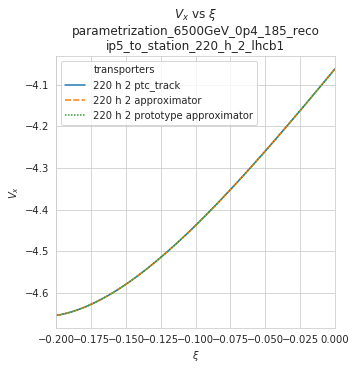

In [12]:
transporters = {
    transporter1_name: (mop.compute_v_x, track_configuration),
    transporter2_name: (aop.compute_v_x, approximator),
    transporter3_name: (aop.compute_v_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "V x", subtitle)

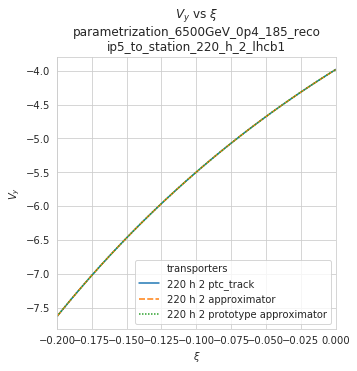

In [13]:
transporters = {
    transporter1_name: (mop.compute_v_y, track_configuration),
    transporter2_name: (aop.compute_v_y, approximator),
    transporter3_name: (aop.compute_v_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "V y", subtitle)

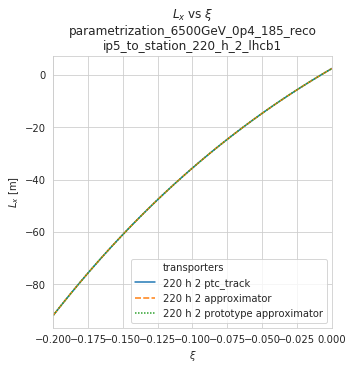

In [14]:
transporters = {
    transporter1_name: (mop.compute_l_x, track_configuration),
    transporter2_name: (aop.compute_l_x, approximator),
    transporter3_name: (aop.compute_l_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "L x", subtitle)

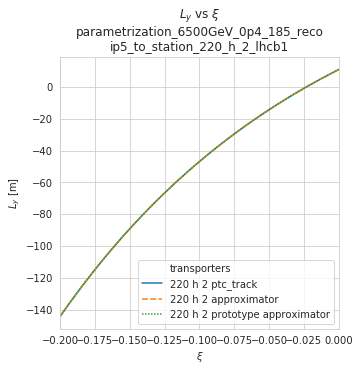

In [15]:
transporters = {
    transporter1_name: (mop.compute_l_y, track_configuration),
    transporter2_name: (aop.compute_l_y, approximator),
    transporter3_name: (aop.compute_l_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "L y", subtitle)

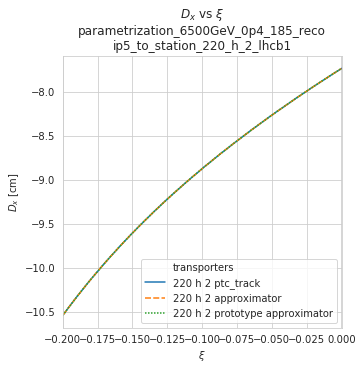

In [16]:
transporters = {
    transporter1_name: (mop.compute_d_x, track_configuration),
    transporter2_name: (aop.compute_d_x, approximator),
    transporter3_name: (aop.compute_d_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "D x", subtitle)

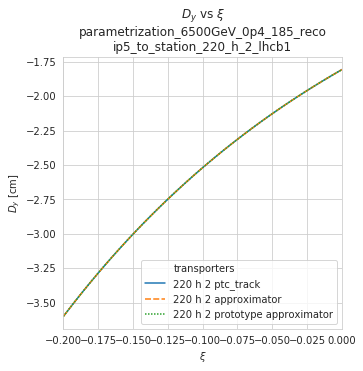

In [17]:
transporters = {
    transporter1_name: (mop.compute_d_y, track_configuration),
    transporter2_name: (aop.compute_d_y, approximator),
    transporter3_name: (aop.compute_d_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "D y", subtitle)